In [4]:
import numpy as np

matrix = np.random.random((10, 3))

best_numbers = matrix[np.arange(10), np.abs(matrix - .5).argmin(axis=1)]

print(matrix)
print(best_numbers)

[[0.17156393 0.17614694 0.33427378]
 [0.83111558 0.66337662 0.9958554 ]
 [0.14313945 0.35584153 0.40392819]
 [0.22198811 0.12129825 0.94655209]
 [0.85931569 0.66794355 0.40287667]
 [0.78067363 0.74278582 0.92207567]
 [0.20346915 0.1917822  0.4135177 ]
 [0.71162964 0.01684862 0.9781131 ]
 [0.66066192 0.4035391  0.69755041]
 [0.45799234 0.30514151 0.28662212]]
[0.33427378 0.66337662 0.40392819 0.22198811 0.40287667 0.74278582
 0.4135177  0.71162964 0.4035391  0.45799234]


In [5]:
matrix = np.random.random((6, 6))

print(matrix)
print(matrix.sum(axis=1) / matrix.min(axis=0))

[[0.21591122 0.04133978 0.2543651  0.44236682 0.29696325 0.1027192 ]
 [0.36074133 0.42224207 0.44010389 0.33689222 0.86612889 0.4101774 ]
 [0.17479617 0.45022052 0.42402478 0.44065698 0.10167281 0.98628842]
 [0.03863105 0.06177174 0.38075694 0.19691943 0.68474467 0.68055632]
 [0.46324327 0.20686474 0.21563794 0.2716704  0.83867372 0.0100322 ]
 [0.84654765 0.17499677 0.33756547 0.00286653 0.65933888 0.99057579]]
[ 35.04086247  68.60911222  11.95364651 712.84106351  19.73115788
 300.22228367]


In [6]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

x[np.where(x[:-1] == 0)[0] + 1].max()

5

In [10]:
x = np.ones(10)
print(x)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(i)

np.add.at(x, i, 1)

print(x)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 2 3 5 5 5 8]
[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [14]:
a = np.arange(16).reshape(4, 4)
form = a.shape[0]

spisok = {i: [a[j, i - j] for j in range(i + 1) if j < N and i - j < N] for i in range(N * 2 - 1)}

print(a)
print(spisok)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


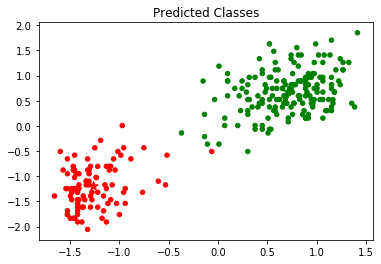

In [42]:
import matplotlib.pyplot as plt

def get_score(pts, centres, labels):
    return sum( \
        np.linalg.norm(pts[labels == label] - centres[label], axis=1).sum() \
            for label in range(centres.shape[0]) \
    ) / pts.shape[0]

def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def kmeans_alg(data, choose_path, steps=20, tochn=1e-05):
    if not isinstance(choose_path, np.ndarray):
        centres = np.random.random((choose_path, data.shape[1]))
    else:
        centres = np.copy(choose_path)

    labels = get_labels(data, centres)
    score = get_score(data, centres, labels)

    best_score = score
    best_centres = centres
    while True:
        centres = np.array([data[labels == label].mean(axis=0) for label in range(centres.shape[0])])
        labels = get_labels(data, centres)
        old_score = score
        score = get_score(data, centres, labels)

        if score < best_score:
            best_score = score
            best_centres = centres
        
        if not isinstance(choose_path, np.ndarray):
            steps -= 1
            if steps == 0:
                break
        
        if abs(score - old_score) < tochn:
            break

    return best_centres, best_score

data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
data = (data - data.mean(axis=0)) / data.std(axis=0)
centres = np.random.uniform(-2, 2, 4).reshape((2, 2))

centres, scores = kmeans_alg(data, 2)
my_labels = get_labels(data, centres)

plt.scatter(*data.T, c=np.where(my_labels, "green", "red"), s=20)
plt.scatter(*centres.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

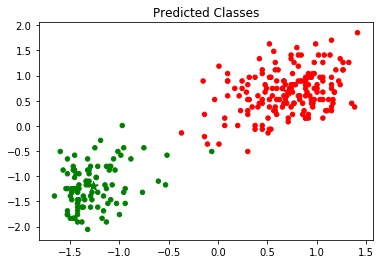

In [43]:
import scipy.cluster

new_centres, new_scores = scipy.cluster.vq.kmeans(data, 2)
labels = get_labels(data, new_centres)

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*new_centres.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

In [44]:
np.abs(centres[::-1, :] - new_centres).max(), scores - new_scores

(0.0, -5.551115123125783e-17)